<a href="https://colab.research.google.com/github/cipi999/Colab/blob/main/Prediksi_Lulusan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/Data Lembaga MAN 1 Bogor.csv')
df

,Alumni Male,Alumni Total,Male Level10,Male Level11,Male Level12,Student Male,Academic Year,Alumni Female,Student Total,Total Level10,...,Total Level12,Female Level10,Female Level11,Female Level12,Student Female,Student Normal,Student Dropout,Student Disability,Student Special Need,Student Stop Learning
0,229,684,160,230,175,620,2020/2021 Genap,455,1693,442,...,512,282,332,337,1073,1688,0,0,5,4
1,229,684,213,147,232,592,2021/2022 Ganjil,455,1573,585,...,570,372,271,338,981,1554,3,0,19,6
2,191,558,216,213,216,645,2023/2024 Ganjil,367,1708,566,...,586,350,343,370,1063,1694,0,7,14,6
3,191,558,217,213,216,646,2023/2024 Genap,367,1708,567,...,586,350,342,370,1062,1694,0,7,14,1
4,216,586,218,212,207,637,2024/2025 Ganjil,370,1654,547,...,546,329,349,339,1017,1652,0,0,2,9
5,216,586,220,211,207,638,2024/2025 Genap,370,1655,548,...,546,328,350,339,1017,1653,0,0,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Alumni Male            6 non-null      int64 
 1   Alumni Total           6 non-null      int64 
 2   Male Level10           6 non-null      int64 
 3   Male Level11           6 non-null      int64 
 4   Male Level12           6 non-null      int64 
 5   Student Male           6 non-null      int64 
 6   Academic Year          6 non-null      object
 7   Alumni Female          6 non-null      int64 
 8   Student Total          6 non-null      int64 
 9   Total Level10          6 non-null      int64 
 10  Total Level11          6 non-null      int64 
 11  Total Level12          6 non-null      int64 
 12  Female Level10         6 non-null      int64 
 13  Female Level11         6 non-null      int64 
 14  Female Level12         6 non-null      int64 
 15  Student Female         6 no

In [ ]:
df.isnull().sum()

,0
Alumni Male,0
Alumni Total,0
Male Level10,0
Male Level11,0
Male Level12,0
Student Male,0
Academic Year,0
Alumni Female,0
Student Total,0
Total Level10,0


/tmp/ipython-input-6-3045763473.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Alumni Total', data=df, palette='viridis')


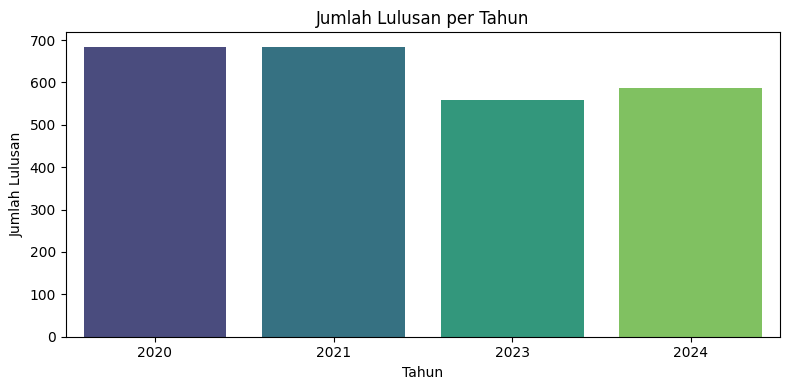

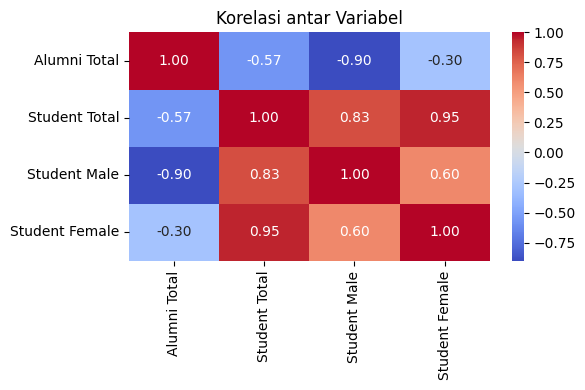

(              Year  Alumni Total  Student Total  Student Male  Student Female
 count     6.000000      6.000000       6.000000      6.000000        6.000000
 mean   2022.500000    609.333333    1665.166667    629.666667     1035.500000
 std       1.643168     59.176572      51.316339     20.675267       36.109556
 min    2020.000000    558.000000    1573.000000    592.000000      981.000000
 25%    2021.500000    565.000000    1654.250000    624.250000     1017.000000
 50%    2023.000000    586.000000    1674.000000    637.500000     1039.500000
 75%    2023.750000    659.500000    1704.250000    643.250000     1062.750000
 max    2024.000000    684.000000    1708.000000    646.000000     1073.000000,
                 Alumni Total  Student Total  Student Male  Student Female
 Alumni Total        1.000000      -0.573205     -0.903208       -0.297449
 Student Total      -0.573205       1.000000      0.827977        0.947054
 Student Male       -0.903208       0.827977      1.000000     

In [ ]:
import seaborn as sns

# ===== DATA PROCESSING =====

# Tampilkan data ringkasan statistik deskriptif
summary_stats = df[['Year', 'Alumni Total', 'Student Total', 'Student Male', 'Student Female']].describe()

# Cek korelasi antar variabel numerik
correlation_matrix = df[['Alumni Total', 'Student Total', 'Student Male', 'Student Female']].corr()

# ===== EXPLORATORY DATA ANALYSIS (EDA) =====

# Visualisasi distribusi jumlah alumni per tahun
plt.figure(figsize=(8, 4))
sns.barplot(x='Year', y='Alumni Total', data=df, palette='viridis')
plt.title('Jumlah Lulusan per Tahun')
plt.ylabel('Jumlah Lulusan')
plt.xlabel('Tahun')
plt.tight_layout()
plt.show()

# Heatmap korelasi antar variabel
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antar Variabel')
plt.tight_layout()
plt.show()

summary_stats, correlation_matrix


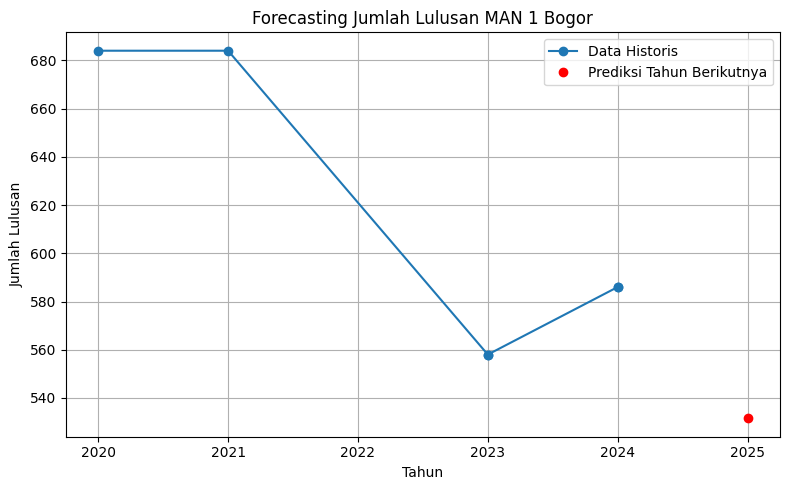

np.float64(531.5555555555547)

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Ekstrak tahun dari "Academic Year" (ambil 4 digit pertama sebagai tahun)
df['Year'] = df['Academic Year'].str.extract(r'(\d{4})').astype(int)

# Siapkan data untuk model
X = df[['Year']]
y = df['Alumni Total']

# Buat model Linear Regression
model = LinearRegression()
model.fit(X, y)

# Prediksi jumlah lulusan untuk tahun berikutnya
next_year = pd.DataFrame({'Year': [df['Year'].max() + 1]})
predicted_alumni = model.predict(next_year)[0]

# Visualisasi hasil prediksi
plt.figure(figsize=(8, 5))
plt.plot(df['Year'], y, marker='o', label='Data Historis')
plt.plot(next_year['Year'], predicted_alumni, 'ro', label='Prediksi Tahun Berikutnya')
plt.title('Forecasting Jumlah Lulusan MAN 1 Bogor')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Lulusan')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

predicted_alumni


In [ ]:
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# ===== MODEL PREDIKSI (Random Forest) =====

# Fitur yang digunakan: Year, Student Total, Student Male, Student Female
features = ['Year', 'Student Total', 'Student Male', 'Student Female']
X = df[features]
y = df['Alumni Total']

# Split data (meskipun kecil, kita pakai full train karena hanya 6 data)
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X, y)

# Prediksi alumni pada data saat ini
df['Predicted Alumni'] = model_rf.predict(X)

# Prediksi tahun depan (Year + 1)
next_year_data = pd.DataFrame({
    'Year': [df['Year'].max() + 1],
    'Student Total': [df['Student Total'].mean()],
    'Student Male': [df['Student Male'].mean()],
    'Student Female': [df['Student Female'].mean()]
})

predicted_next_year = model_rf.predict(next_year_data)[0]

# Tambahkan data prediksi tahun depan ke DataFrame baru
future_df = pd.concat([
    df[['Year', 'Alumni Total', 'Predicted Alumni']],
    pd.DataFrame({
        'Year': [next_year_data['Year'][0]],
        'Alumni Total': [None],
        'Predicted Alumni': [predicted_next_year]
    })
], ignore_index=True)

# ===== VISUALISASI INTERAKTIF =====
fig = go.Figure()

# Garis alumni aktual
fig.add_trace(go.Scatter(
    x=future_df['Year'],
    y=future_df['Alumni Total'],
    mode='lines+markers',
    name='Alumni Aktual',
    line=dict(color='royalblue')
))

# Garis alumni prediksi
fig.add_trace(go.Scatter(
    x=future_df['Year'],
    y=future_df['Predicted Alumni'],
    mode='lines+markers',
    name='Alumni Prediksi',
    line=dict(color='firebrick', dash='dash')
))

fig.update_layout(
    title='Prediksi Jumlah Lulusan MAN 1 Bogor (Interaktif)',
    xaxis_title='Tahun',
    yaxis_title='Jumlah Lulusan',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import plotly.graph_objects as go

# Load data
df = pd.read_csv('/content/Data Lembaga MAN 1 Bogor.csv')

# Ekstrak tahun dari kolom 'Academic Year'
df['Year'] = df['Academic Year'].str.extract(r'(\d{4})').astype(int)

# Fitur dan target
features = ['Year', 'Student Total', 'Student Male', 'Student Female']
X = df[features]
y = df['Alumni Total']

# Model Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X, y)

# Prediksi pada data historis
df['Predicted Alumni'] = model_rf.predict(X)

# Prediksi tahun berikutnya
next_year = df['Year'].max() + 1
avg_row = {
    'Year': next_year,
    'Student Total': df['Student Total'].mean(),
    'Student Male': df['Student Male'].mean(),
    'Student Female': df['Student Female'].mean()
}
future_df = df[['Year', 'Alumni Total', 'Predicted Alumni']].copy()

# Use pd.concat instead of append
future_df = pd.concat([future_df, pd.DataFrame({
    'Year': [next_year],
    'Alumni Total': [None],
    'Predicted Alumni': [model_rf.predict(pd.DataFrame([avg_row]))[0]]
})], ignore_index=True)

# Plot interaktif
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=future_df['Year'],
    y=future_df['Alumni Total'],
    mode='lines+markers',
    name='Alumni Aktual',
    line=dict(color='royalblue')
))

fig.add_trace(go.Scatter(
    x=future_df['Year'],
    y=future_df['Predicted Alumni'],
    mode='lines+markers',
    name='Prediksi Alumni',
    line=dict(color='firebrick', dash='dash')
))

fig.update_layout(
    title='Prediksi Jumlah Lulusan MAN 1 Bogor',
    xaxis_title='Tahun',
    yaxis_title='Jumlah Lulusan',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import plotly.graph_objects as go

# ======================
# 1. Load dan Persiapan Data
# ======================
df = pd.read_csv('/content/Data Lembaga MAN 1 Bogor.csv')

# Ekstrak tahun dari "Academic Year"
df['Year'] = df['Academic Year'].str.extract(r'(\d{4})').astype(int)

# ======================
# 2. Pilih Fitur
# ======================
features = [
    'Year', 'Student Total', 'Student Male', 'Student Female',
    'Total Level12', 'Student Dropout', 'Student Disability',
    'Student Special Need', 'Student Stop Learning'
]

X = df[features]
y = df['Alumni Total']

# ======================
# 3. Model Random Forest
# ======================
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Prediksi pada data historis
df['Predicted Alumni'] = model.predict(X)

# ======================
# 4. Prediksi Tahun Berikutnya
# ======================
next_year = df['Year'].max() + 1
avg_row = {
    col: df[col].mean() for col in features
}
avg_row['Year'] = next_year

future_df = df[['Year', 'Alumni Total', 'Predicted Alumni']].copy()

# Use pd.concat instead of append
future_df = pd.concat([future_df, pd.DataFrame({
    'Year': [next_year],
    'Alumni Total': [None],
    'Predicted Alumni': [model.predict(pd.DataFrame([avg_row]))[0]]
})], ignore_index=True)

# ======================
# 5. Visualisasi Interaktif
# ======================
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=future_df['Year'],
    y=future_df['Alumni Total'],
    mode='lines+markers',
    name='Alumni Aktual',
    line=dict(color='royalblue')
))

fig.add_trace(go.Scatter(
    x=future_df['Year'],
    y=future_df['Predicted Alumni'],
    mode='lines+markers',
    name='Prediksi Alumni',
    line=dict(color='firebrick', dash='dash')
))

fig.update_layout(
    title='Prediksi Jumlah Lulusan MAN 1 Bogor (dengan Fitur Tambahan)',
    xaxis_title='Tahun',
    yaxis_title='Jumlah Lulusan',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import streamlit as st
from sklearn.ensemble import RandomForestRegressor
import joblib

# ====================
# LOAD DATA DAN MODEL
# ====================
df = pd.read_csv("Data Lembaga MAN 1 Bogor.csv")
df['Year'] = df['Academic Year'].str.extract(r'(\d{4})').astype(int)

features = [
    'Year', 'Student Total', 'Student Male', 'Student Female',
    'Total Level12', 'Student Dropout', 'Student Disability',
    'Student Special Need', 'Student Stop Learning'
]

X = df[features]
y = df['Alumni Total']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# ====================
# STREAMLIT UI
# ====================
st.title("Prediksi Jumlah Lulusan MAN 1 Bogor")

year = st.number_input("Tahun Prediksi", value=df['Year'].max() + 1)
student_total = st.number_input("Jumlah Siswa Total", value=int(df['Student Total'].mean()))
student_male = st.number_input("Jumlah Siswa Laki-laki", value=int(df['Student Male'].mean()))
student_female = st.number_input("Jumlah Siswa Perempuan", value=int(df['Student Female'].mean()))
total_level12 = st.number_input("Jumlah Siswa Kelas 12", value=int(df['Total Level12'].mean()))
dropout = st.number_input("Jumlah Dropout", value=0)
disability = st.number_input("Jumlah Disabilitas", value=0)
special_need = st.number_input("Jumlah Berkebutuhan Khusus", value=0)
stop_learning = st.number_input("Jumlah Berhenti Belajar", value=0)

# ====================
# PREDIKSI
# ====================
input_data = pd.DataFrame([{
    'Year': year,
    'Student Total': student_total,
    'Student Male': student_male,
    'Student Female': student_female,
    'Total Level12': total_level12,
    'Student Dropout': dropout,
    'Student Disability': disability,
    'Student Special Need': special_need,
    'Student Stop Learning': stop_learning
}])

prediction = model.predict(input_data)[0]
st.success(f"🎓 Prediksi Jumlah Lulusan: {round(prediction)} orang")


2025-07-02 15:08:07.621 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 15:08:08.025 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-02 15:08:08.029 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 15:08:08.034 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 15:08:08.040 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 15:08:08.044 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 15:08:08.047 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 15:08:08.055 Thread 'MainThread': mi

DeltaGenerator()

In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import ipywidgets as widgets
from IPython.display import display

# ===== Load dan Persiapan Data =====
df = pd.read_csv('Data Lembaga MAN 1 Bogor.csv')
df['Year'] = df['Academic Year'].str.extract(r'(\d{4})').astype(int)

features = [
    'Year', 'Student Total', 'Student Male', 'Student Female',
    'Total Level12', 'Student Dropout', 'Student Disability',
    'Student Special Need', 'Student Stop Learning'
]

X = df[features]
y = df['Alumni Total']

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# ====== Widget Input ======
year = widgets.IntText(value=df['Year'].max() + 1, description='Tahun:')
student_total = widgets.IntText(value=int(df['Student Total'].mean()), description='Siswa Total:')
student_male = widgets.IntText(value=int(df['Student Male'].mean()), description='Siswa Laki_laki:')
student_female = widgets.IntText(value=int(df['Student Female'].mean()), description='Siswa Perempuan:')
level12 = widgets.IntText(value=int(df['Total Level12'].mean()), description='Kelas 12:')
dropout = widgets.IntText(value=0, description='Dropout:')
disability = widgets.IntText(value=0, description='Disabilitas:')
special_need = widgets.IntText(value=0, description='Berkebutuhan:')
stop_learning = widgets.IntText(value=0, description='Pindah/Undur Diri:')

button = widgets.Button(description="Prediksi Lulusan 🎓")

# ====== Fungsi Prediksi ======
def on_button_clicked(b):
    input_data = pd.DataFrame([{
        'Year': year.value,
        'Student Total': student_total.value,
        'Student Male': student_male.value,
        'Student Female': student_female.value,
        'Total Level12': level12.value,
        'Student Dropout': dropout.value,
        'Student Disability': disability.value,
        'Student Special Need': special_need.value,
        'Student Stop Learning': stop_learning.value
    }])

    prediction = model.predict(input_data)[0]
    print(f"\n🎯 Prediksi jumlah lulusan: {round(prediction)} orang")

# Assign fungsi ke tombol
button.on_click(on_button_clicked)

# Tampilkan form
display(year, student_total, student_male, student_female,
        level12, dropout, disability, special_need, stop_learning, button)


IntText(value=2025, description='Tahun:')

IntText(value=1665, description='Siswa Total:')

IntText(value=629, description='Siswa Laki_laki:')

IntText(value=1035, description='Siswa Perempuan:')

IntText(value=557, description='Kelas 12:')

IntText(value=0, description='Dropout:')

IntText(value=0, description='Disabilitas:')

IntText(value=0, description='Berkebutuhan:')

IntText(value=0, description='Pindah/Undur Diri:')

Button(description='Prediksi Lulusan 🎓', style=ButtonStyle())